# Time Series EDA on accident data 

**Problem Statement:** Monitoring the rate of RTCs over time.

* Here we will be using accident dataset to understanding the Road Traffic Collision (RTC) with time and derrive some conclusions. 

* We will start with data description and cleaning, then we will visualize our data to understand better. These processes can be called EDA (Exploratory Data Analysis).

The dataste has 2047256 rows and 34 columns 

# 1. Exploring the data

Data is first collected from the source and loaded into the python platform.

## 1.1 Importing the required packages

In [ ]:
import numpy as np # For mathematical operations
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization library
import matplotlib.pyplot as plt # visualization library

# import warnings library
import warnings        
# ignore filters
warnings.filterwarnings("ignore") # if there is a warning after some codes, this will avoid us to see them.

plt.style.use('ggplot') # style of plots. ggplot is one of the most used style

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller 
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm


## 1.2 Import the dataset and data cleaning

**Import data in pandas dataframe**

In [ ]:
df = pd.read_parquet('/content/drive/MyDrive/Omdena dataset/accident_data_time_series.parquet')
pd.set_option('display.max_columns', 50)
df.head()

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(District),Local_Authority_(Highway),Location_Easting_OSGR,Location_Northing_OSGR,Longitude,LSOA_of_Accident_Location,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,200501BS00001,A,3218.0,None,0.0,Serious,None,2005-01-04,Tuesday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.489096,Daylight,Kensington and Chelsea,Kensington and Chelsea,525680.0,178240.0,-0.191170,E01002849,1,1,0.0,1.0,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,17:42,Urban,Raining no high winds,2005,No
1,200501BS00002,B,450.0,C,0.0,Slight,None,2005-01-05,Wednesday,1.0,Auto traffic signal,Crossroads,51.520075,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524170.0,181650.0,-0.211708,E01002909,1,1,0.0,5.0,Metropolitan Police,Dry,Dual carriageway,None,30.0,17:36,Urban,Fine no high winds,2005,No
2,200501BS00003,C,0.0,None,0.0,Slight,None,2005-01-06,Thursday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.525301,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524520.0,182240.0,-0.206458,E01002857,1,2,0.0,0.0,Metropolitan Police,Dry,Single carriageway,None,30.0,00:15,Urban,Fine no high winds,2005,No
3,200501BS00004,A,3220.0,None,0.0,Slight,None,2005-01-07,Friday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.482442,Daylight,Kensington and Chelsea,Kensington and Chelsea,526900.0,177530.0,-0.173862,E01002840,1,1,0.0,0.0,Metropolitan Police,Dry,Single carriageway,None,30.0,10:35,Urban,Fine no high winds,2005,No
4,200501BS00005,Unclassified,0.0,None,0.0,Slight,None,2005-01-10,Monday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.495752,Darkness - lighting unknown,Kensington and Chelsea,Kensington and Chelsea,528060.0,179040.0,-0.156618,E01002863,1,1,0.0,0.0,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,21:13,Urban,Fine no high winds,2005,No


**Checking for the shape of the dataset**

In [ ]:
df.shape

(2047256, 34)

**Cheching for the columns in the dataset**

In [ ]:
df.columns

Index(['Accident_Index', '1st_Road_Class', '1st_Road_Number', '2nd_Road_Class',
       '2nd_Road_Number', 'Accident_Severity', 'Carriageway_Hazards', 'Date',
       'Day_of_Week', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Junction_Control', 'Junction_Detail', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'LSOA_of_Accident_Location', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site',
       'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Year', 'InScotland'],
      dtype='object')

### Observations:
1. Dataset has 2047256  rows 
2. Dataset has 34 columns
3. Columns name :''Accident_Index', '1st_Road_Class', '1st_Road_Number', '2nd_Road_Class', '2nd_Road_Number', 'Accident_Severity', 'Carriageway_Hazards', 'Date', 'Day_of_Week', 'Did_Police_Officer_Attend_Scene_of_Accident', 'Junction_Control', 'Junction_Detail', 'Latitude', 'Light_Conditions',       'Local_Authority_(District)',  'Local_Authority_(Highway)', 'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
'LSOA_of_Accident_Location', 'Number_of_Casualties','Number_of_Vehicles', 'Pedestrian_Crossing-Human_Control',
'Pedestrian_Crossing-Physical_Facilities', 'Police_Force',      'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site',
'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions','Year', 'InScotland'

**Data Cleaning**

**Removing redundant column from dataframe.**

''Accident_Index', '1st_Road_Number',  '2nd_Road_Number',  'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude', 'Latitude' are redundant column and wont be required in Time Series EDA / analysis

In [ ]:
df.drop(columns = ['Accident_Index','LSOA_of_Accident_Location', 'Special_Conditions_at_Site','1st_Road_Number',  '2nd_Road_Number',  'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude', 'Latitude'], inplace = True)

Checking the dataypes of columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2047256 entries, 0 to 2047255
Data columns (total 25 columns):
 #   Column                                       Dtype  
---  ------                                       -----  
 0   1st_Road_Class                               object 
 1   2nd_Road_Class                               object 
 2   Accident_Severity                            object 
 3   Carriageway_Hazards                          object 
 4   Date                                         object 
 5   Day_of_Week                                  object 
 6   Did_Police_Officer_Attend_Scene_of_Accident  float64
 7   Junction_Control                             object 
 8   Junction_Detail                              object 
 9   Light_Conditions                             object 
 10  Local_Authority_(District)                   object 
 11  Local_Authority_(Highway)                    object 
 12  Number_of_Casualties                         int64  
 13  Number_of_Ve

### Observation: 
1. Date column is object type and it should be of date timetype column.
2. Did_Police_Officer_Attend_Scene_of_Accident  is float type and need to be object type.
3. Time coulum is object type and need to be changed in time format. 
4. Speed_limit should be an object type instead of integer type. 


Working on date columns

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

Working on time column

In [ ]:
df['Time'] = pd.to_datetime(df['Time']).dt.time


Working on speed limit column 

In [ ]:
df['Speed_limit'] = df['Speed_limit'].apply(lambda x: str(x))

Working on Number_of_casulaity

In [ ]:
# df['Number_of_Casualties'] = df['Number_of_Casualties'].apply(lambda x: x if x < 5 else 'High Casuality').replace(1, 'One').replace(2, 'Two').replace(3, 'Three').replace(4, 'Four')

**Checking for duplicate values**

Check for duplicate values and if present then drop the same.

In [ ]:
index = df[df.duplicated()].index


In [ ]:
df.drop(index, inplace = True)


**Summary of Dataset**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Did_Police_Officer_Attend_Scene_of_Accident,2046794.0,1.202324,0.408198,1.0,1.0,1.0,1.0,3.0
Number_of_Casualties,2047072.0,1.345863,0.817984,1.0,1.0,1.0,1.0,93.0
Number_of_Vehicles,2047072.0,1.833553,0.715059,1.0,1.0,2.0,2.0,67.0
Pedestrian_Crossing-Human_Control,2044152.0,0.010418,0.135119,0.0,0.0,0.0,0.0,2.0
Pedestrian_Crossing-Physical_Facilities,2043512.0,0.751849,1.835338,0.0,0.0,0.0,0.0,8.0
Year,2047072.0,2010.523768,3.765612,2005.0,2007.0,2010.0,2014.0,2017.0


**Checking for unique values and missing values in categorical columns**

In [ ]:
categorical_column = [cols for cols in df.columns if df[cols].dtype == 'O']
numerical_column = [cols for cols in df.columns if df[cols].dtype != 'O']

for col in categorical_column:
    print('------' * 10)
    print('Number of Unique values')
    print(col, df[col].nunique())
    print('Unique values')
    if df[col].nunique() > 10:
        print(col, df[col].unique()[0:10])
    else:
        print(df[col].value_counts(ascending = False)/len(df)*100)
        print('Percentage of null values')
        print(df[col].isna().sum() / len(df)* 100)
    print('Null values')
    print(col, df[col].isna().sum())

------------------------------------------------------------
Number of Unique values
1st_Road_Class 6
Unique values
A               45.266410
Unclassified    29.500477
B               12.606103
C                8.545620
Motorway         3.813398
A(M)             0.267993
Name: 1st_Road_Class, dtype: float64
Percentage of null values
0.0
Null values
1st_Road_Class 0
------------------------------------------------------------
Number of Unique values
2nd_Road_Class 6
Unique values
Unclassified    39.810129
A                9.834095
C                4.497741
B                3.891265
Motorway         0.655961
A(M)             0.074497
Name: 2nd_Road_Class, dtype: float64
Percentage of null values
41.236312157071175
Null values
2nd_Road_Class 844137
------------------------------------------------------------
Number of Unique values
Accident_Severity 3
Unique values
Slight     84.724963
Serious    13.987002
Fatal       1.288035
Name: Accident_Severity, dtype: float64
Percentage of null val

Observation:
1. Data missing out of range is same as nan, so replacing the same
2. Speed limit column has 'nan' and '0.0' entries. Replacing the same with nan.
3. In Light_Conditions column 'Darkness - no lighting', 'Darkness - lights unlit' are the same  with different entries. 
4. In 'Road_type' column, Unknown enrty is similar to nan values. 
5. In Weather_Conditions columns, Unknown  is similar to nan values. 
6. Dropping 2nd_class_road column as it has more than 40 % of missing values.  

Putting nan values in place of "Data missing out of range"

In [ ]:
df = df.replace('Data missing or out of range', np.nan).replace('nan', np.nan).replace('0.0', np.nan)


Cleaning Light_condition columns

In [ ]:
df['Light_Conditions'] = df['Light_Conditions'].replace('Darkness - no lighting', 'Darkness - lights unlit' )
df['Light_Conditions'].unique()

array(['Daylight', 'Darkness - lights lit', 'Darkness - lighting unknown',
       'Darkness - lights unlit', nan], dtype=object)

Cleaning road type column

In [ ]:
df['Road_Type'] = df['Road_Type'].replace('Unknown', np.nan )
df['Road_Type'].unique()

array(['Single carriageway', 'Dual carriageway', 'One way street',
       'Roundabout', 'Slip road', nan], dtype=object)

Cleaning Weather_Conditions columns

In [ ]:
df['Weather_Conditions'] = df['Weather_Conditions'].replace('Unknown', np.nan)
df['Weather_Conditions'].unique()

array(['Raining no high winds', 'Fine no high winds', nan,
       'Snowing no high winds', 'Other', 'Fine + high winds',
       'Raining + high winds', 'Fog or mist', 'Snowing + high winds'],
      dtype=object)

Dropping 2nd_class_road column

In [ ]:
df.drop(columns = ['2nd_Road_Class'], inplace = True)

Data Cleaning has been completed 

<<<<<<<<<<<<<<<<<<<<<<<<<<<


# 2. Data Visualization 

Dividing the data set on the basis of Scotland

In [ ]:

df_scotland = df[df['InScotland'] == 'Yes']
df_not_scotland = df[df['InScotland'] == 'No']

## 2.1 Analysis for accident severity with date, year, month, quarter

Text(0.5, 1.0, 'Slight Accident with time')

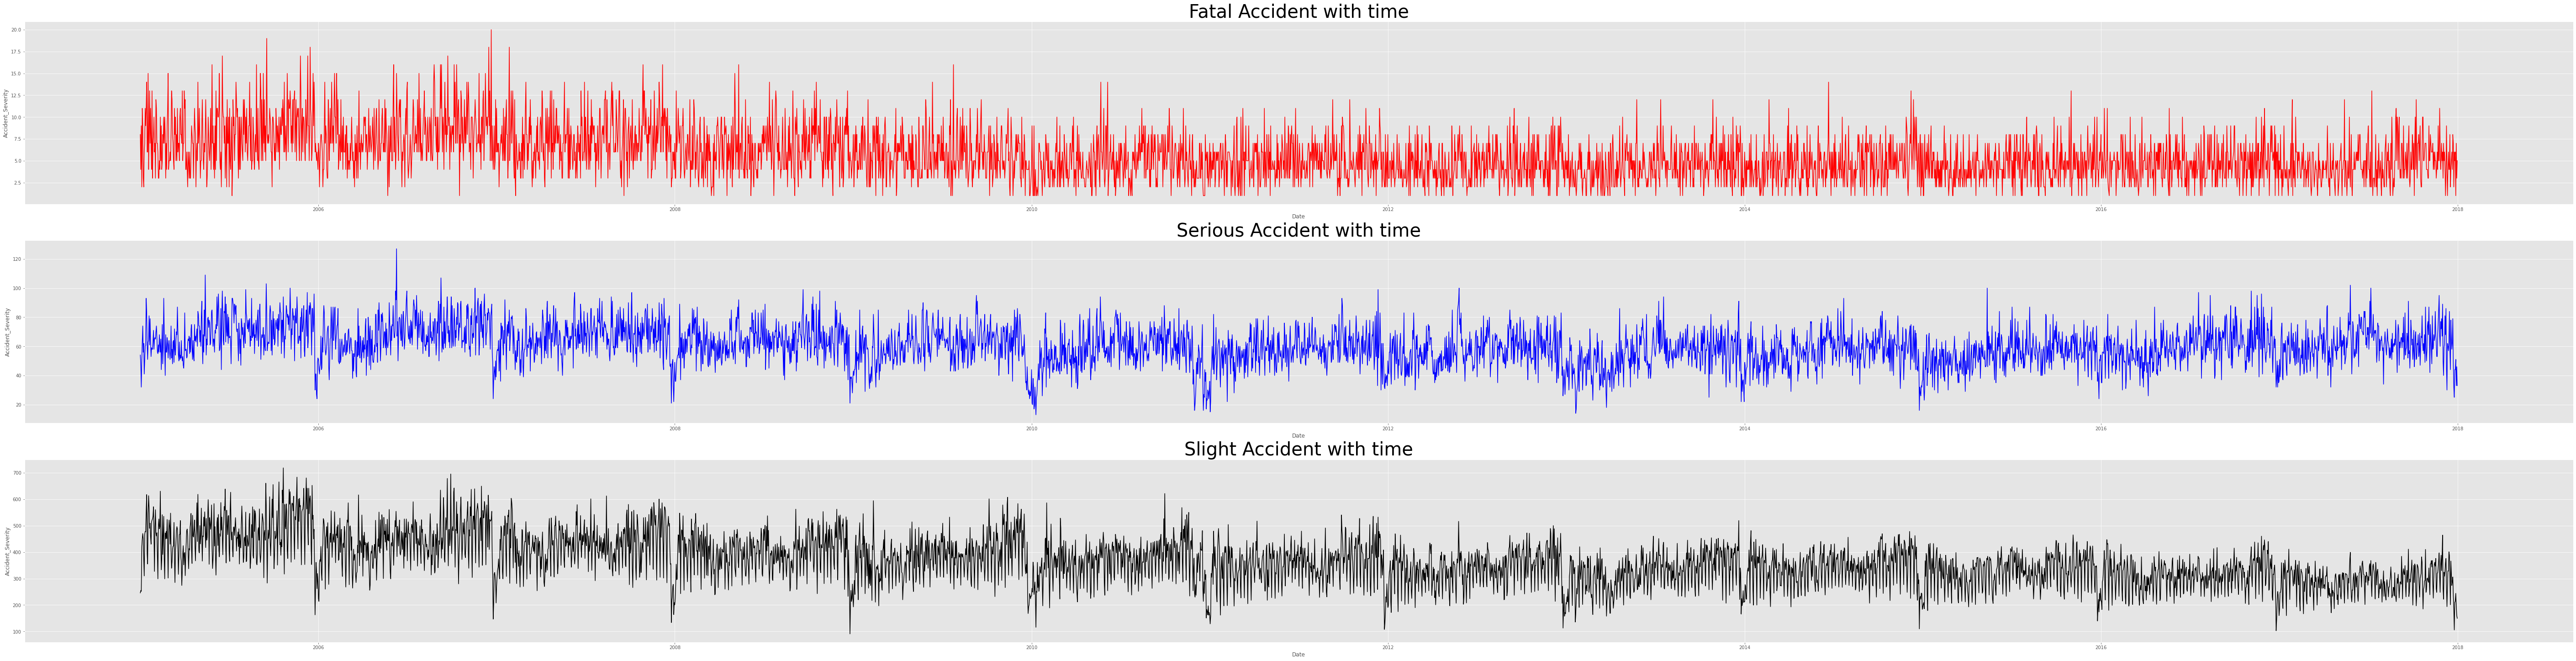

In [ ]:
# analysing the count of accident sevearity date wise
df_fatal = df[df['Accident_Severity'] == 'Fatal'][['Accident_Severity','Date']].groupby(by = 'Date').count()
df_serious = df[df['Accident_Severity'] == 'Serious'][['Accident_Severity','Date']].groupby(by = 'Date').count()
df_slight = df[df['Accident_Severity'] == 'Slight'][['Accident_Severity','Date']].groupby(by = 'Date').count()

figure, axes = plt.subplots(3, figsize=( 100, 25))
plt.grid('both')

sns.lineplot(  y="Accident_Severity", x= df_fatal.index, data=df_fatal,  ax=axes[0], color = 'red')

sns.lineplot(  y="Accident_Severity", x= df_serious.index, data=df_serious,  ax=axes[1], color = 'blue')

sns.lineplot(  y="Accident_Severity", x= df_slight.index, data=df_slight,  ax=axes[2], color = 'black')

axes[0].set_title('Fatal Accident with time',fontsize= 40)
axes[1].set_title('Serious Accident with time',fontsize=40)
axes[2].set_title('Slight Accident with time', fontsize= 40)

In [ ]:
# Calculating days where most fatal accicent caused
dates_fatal = df_fatal.sort_values('Accident_Severity', ascending = False).head(10).index

df_fatal_10 = pd.DataFrame()
for i in range(len(dates_fatal)):
    df_fatal_10 = df_fatal_10.append(df[(df['Date'] == dates_fatal[i]) & (df['Accident_Severity'] == 'Fatal')])

df_fatal_10


,1st_Road_Class,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Light_Conditions,Local_Authority_(District),Local_Authority_(Highway),Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
215337,C,Fatal,None,2006-12-21,Thursday,1.0,Auto traffic signal,T or staggered junction,Daylight,Camden,Camden,1,2,0.0,5.0,Metropolitan Police,Wet or damp,Single carriageway,30.0,09:17:00,Urban,Raining no high winds,2006,No
215338,A,Fatal,None,2006-12-21,Thursday,1.0,Auto traffic signal,More than 4 arms (not roundabout),Darkness - lights lit,Camden,Camden,1,1,0.0,5.0,Metropolitan Police,Dry,Dual carriageway,30.0,02:30:00,Urban,Fine no high winds,2006,No
215341,B,Fatal,None,2006-12-21,Thursday,1.0,Give way or uncontrolled,T or staggered junction,Darkness - lights lit,Camden,Camden,1,1,0.0,1.0,Metropolitan Police,Wet or damp,Single carriageway,30.0,17:59:00,Urban,Fog or mist,2006,No
227431,A,Fatal,None,2006-12-21,Thursday,1.0,Auto traffic signal,Crossroads,Daylight,South Ribble,Lancashire,2,1,0.0,5.0,Lancashire,Dry,Single carriageway,30.0,13:55:00,Urban,Fine no high winds,2006,No
237891,C,Fatal,None,2006-12-21,Thursday,1.0,NaN,Not at junction or within 20 metres,Darkness - lights lit,Tameside,Tameside,1,1,0.0,0.0,Greater Manchester,Wet or damp,Single carriageway,30.0,17:05:00,Urban,Fine no high winds,2006,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349893,A,Fatal,None,2006-06-04,Sunday,1.0,Give way or uncontrolled,T or staggered junction,Daylight,Carrick,Cornwall,3,1,0.0,0.0,Devon and Cornwall,Dry,Single carriageway,50.0,18:30:00,Rural,Fine no high winds,2006,No
357118,A,Fatal,None,2006-06-04,Sunday,1.0,Give way or uncontrolled,Crossroads,Darkness - lights lit,South Gloucestershire,South Gloucestershire,1,2,0.0,8.0,Avon and Somerset,Dry,Single carriageway,30.0,02:52:00,Urban,Fine no high winds,2006,No
374531,A,Fatal,None,2006-06-04,Sunday,1.0,NaN,Not at junction or within 20 metres,Daylight,Powys,Powys,1,1,0.0,0.0,Dyfed-Powys,Dry,Single carriageway,60.0,14:00:00,Rural,Fine no high winds,2006,No
375458,A,Fatal,None,2006-06-04,Sunday,1.0,NaN,Not at junction or within 20 metres,Daylight,Highland,Highland,1,2,0.0,0.0,Northern,Dry,Single carriageway,60.0,18:50:00,Rural,Fine no high winds,2006,Yes


Observation:
1. With time Slight and fatal Accident count has been decreased.
2. It seems there is no change in Serious accident cases

Text(0.5, 1.0, 'Slight Accident with time')

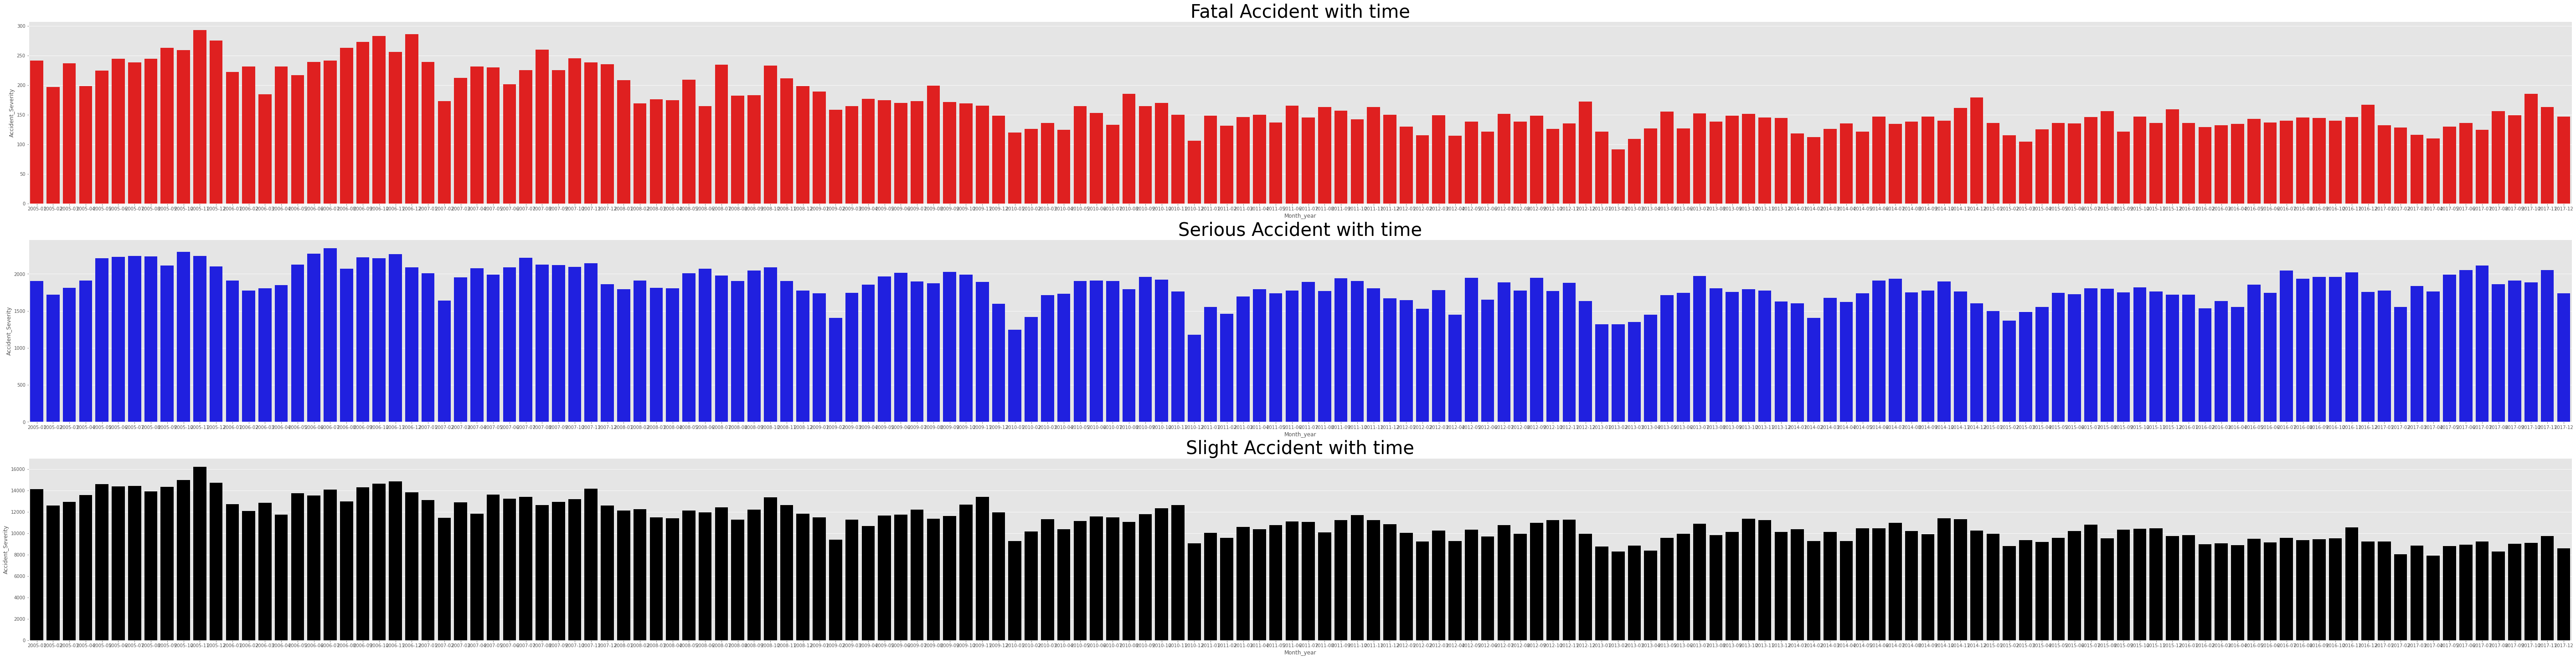

In [ ]:
# analysing the count of accident sevearity Month wise
df['Month_year'] = df['Date'].apply(lambda x: x.strftime('%Y-%m'))

df_fatal = df[df['Accident_Severity'] == 'Fatal'][['Accident_Severity','Month_year']].groupby(by = 'Month_year').count()
df_serious = df[df['Accident_Severity'] == 'Serious'][['Accident_Severity','Month_year']].groupby(by = 'Month_year').count()
df_slight = df[df['Accident_Severity'] == 'Slight'][['Accident_Severity','Month_year']].groupby(by = 'Month_year').count()


figure, axes = plt.subplots(3, figsize=( 100, 25))
plt.grid('both')

sns.barplot(  y="Accident_Severity", x= df_fatal.index, data=df_fatal,  ax=axes[0], color = 'red')

sns.barplot(  y="Accident_Severity", x= df_serious.index, data=df_serious,  ax=axes[1], color = 'blue')

sns.barplot(  y="Accident_Severity", x= df_slight.index, data=df_slight,  ax=axes[2], color = 'black')


axes[0].set_title('Fatal Accident with time',fontsize= 40)
axes[1].set_title('Serious Accident with time',fontsize=40)
axes[2].set_title('Slight Accident with time', fontsize= 40)

Observations: 
1. It seems that  October, November December and January has more accidents as compared to other months. 

Text(0.5, 1.0, 'Slight Accident with time')

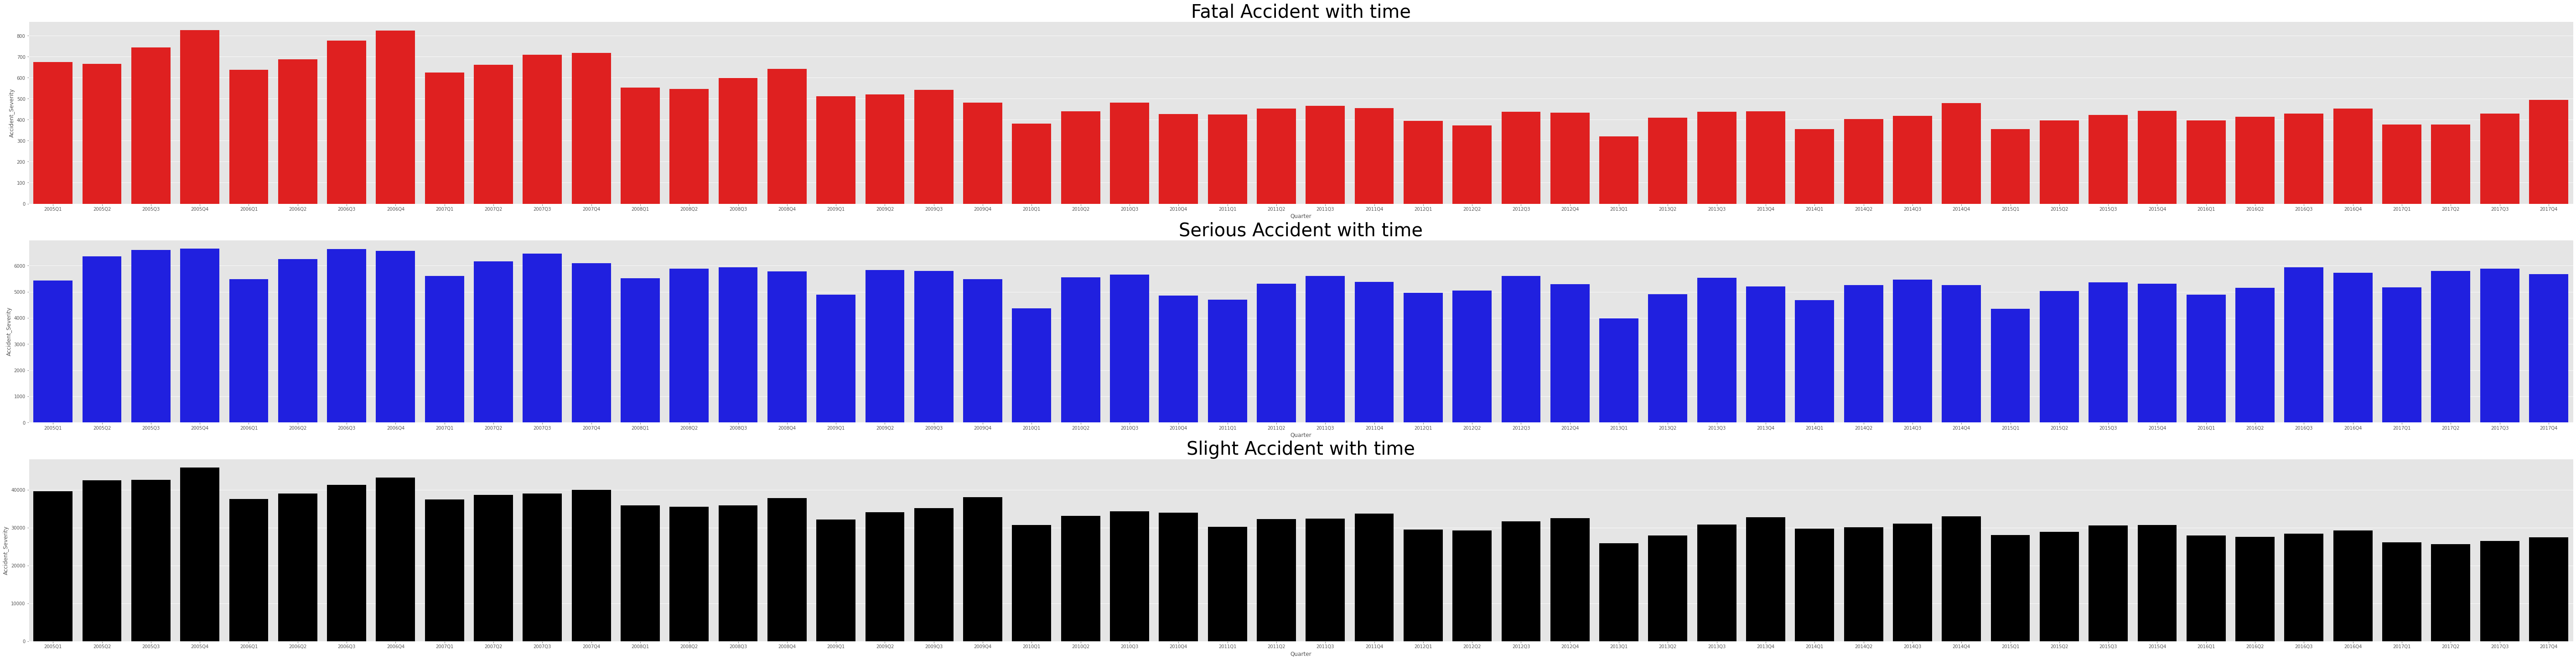

In [ ]:
# analysing the count of accident sevearity quarter wise
df['Quarter'] = df['Date'].dt.to_period('Q')

df_fatal = df[df['Accident_Severity'] == 'Fatal'][['Accident_Severity','Quarter']].groupby(by = 'Quarter').count()
df_serious = df[df['Accident_Severity'] == 'Serious'][['Accident_Severity','Quarter']].groupby(by = 'Quarter').count()
df_slight = df[df['Accident_Severity'] == 'Slight'][['Accident_Severity','Quarter']].groupby(by = 'Quarter').count()


figure, axes = plt.subplots(3, figsize=( 100, 25))
plt.grid('both')

sns.barplot(  y="Accident_Severity", x= df_fatal.index, data=df_fatal,  ax=axes[0], color = 'red')

sns.barplot(  y="Accident_Severity", x= df_serious.index, data=df_serious,  ax=axes[1], color = 'blue')

sns.barplot(  y="Accident_Severity", x= df_slight.index, data=df_slight,  ax=axes[2], color = 'black')


axes[0].set_title('Fatal Accident with time',fontsize= 40)
axes[1].set_title('Serious Accident with time',fontsize=40)
axes[2].set_title('Slight Accident with time', fontsize= 40)


Observations:
1. Quarter Q4 has high accident counts in a year.

Text(0.5, 1.0, 'Slight Accident with time')

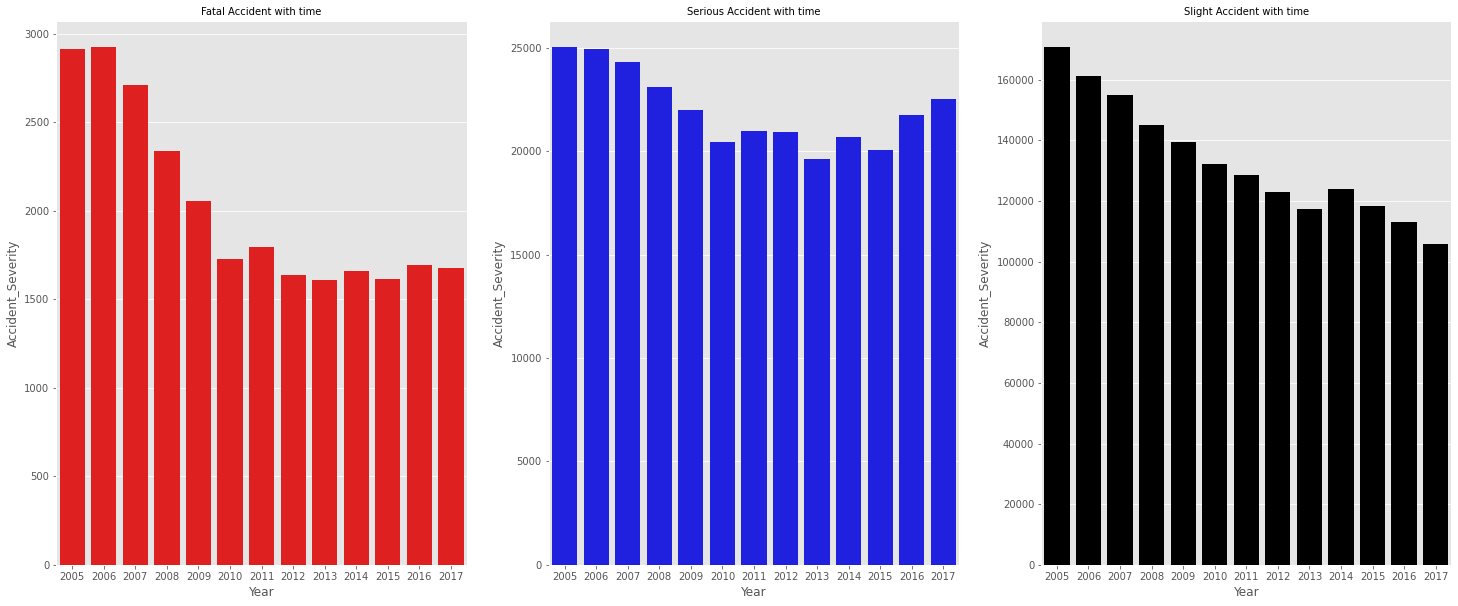

In [ ]:
# analysing the count of accident sevearity Year wise

df_fatal = df[df['Accident_Severity'] == 'Fatal'][['Accident_Severity','Year']].groupby(by = 'Year').count()
df_serious = df[df['Accident_Severity'] == 'Serious'][['Accident_Severity','Year']].groupby(by = 'Year').count()
df_slight = df[df['Accident_Severity'] == 'Slight'][['Accident_Severity','Year']].groupby(by = 'Year').count()

figure, axes = plt.subplots(1,3, figsize=( 25, 10))
plt.grid('both')

sns.barplot(  y="Accident_Severity", x= df_fatal.index, data=df_fatal,  ax=axes[0], color = 'red')

sns.barplot(  y="Accident_Severity", x= df_serious.index, data=df_serious,  ax=axes[1], color = 'blue')

sns.barplot(  y="Accident_Severity", x= df_slight.index, data=df_slight,  ax=axes[2], color = 'black')


axes[0].set_title('Fatal Accident with time',  fontsize= 10)
axes[1].set_title('Serious Accident with time',  fontsize=10)
axes[2].set_title('Slight Accident with time', fontsize= 10)


# ax = sns.countplot(data = df, hue ='Accident_Severity' , x = 'Year' )
# for p in ax.patches:
#     ax.annotate(f'\n{p.get_height() }', (p.get_x(), p.get_height()), ha='left', va='top', color='black', size=18)
# plt.legend(loc = 'best' , fontsize = 50, shadow = True, facecolor = 'lightpink' )
# plt.xticks(fontsize = 50)
# plt.yticks(fontsize = 50)
# plt.title('Year wise accident from 2005 to 2018', fontsize = 50)

# plt.show(block = False)

Observation : 
1. From 2005 to 2017 Slight accident cases are drastically reduced 
2. Slight  changes in Fatal and serious accidents

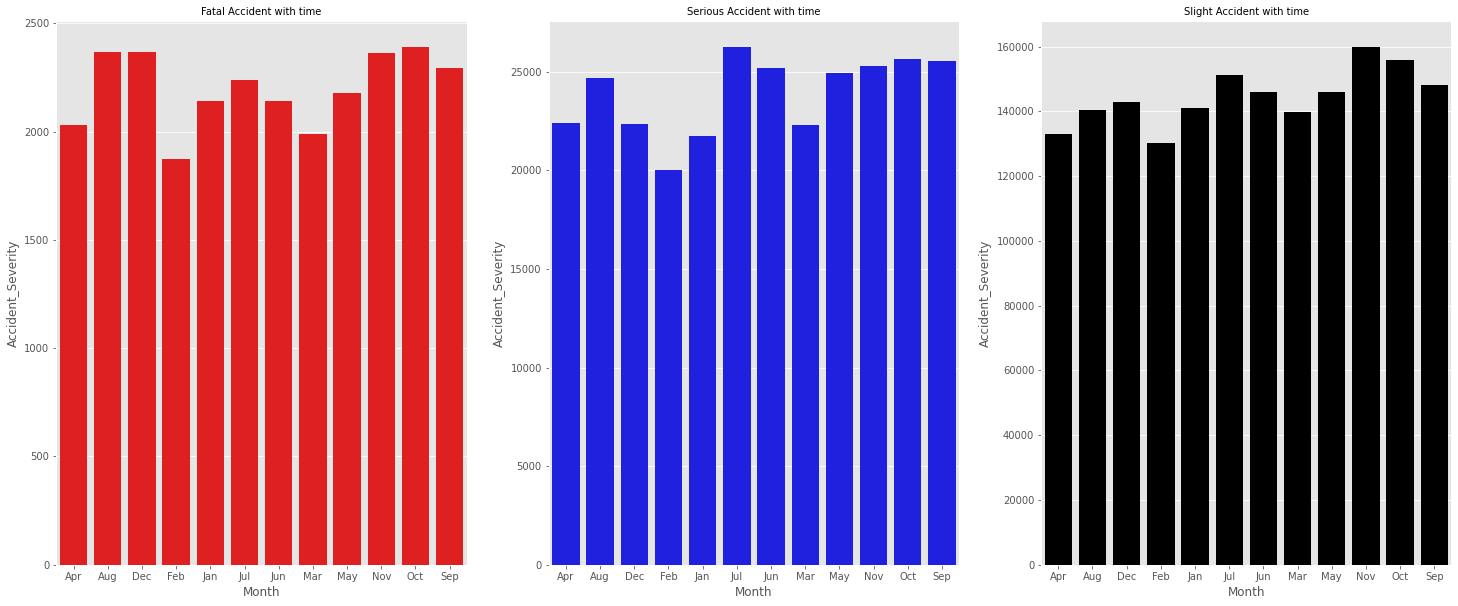

In [ ]:
# analysing the total count of accident in each month

df['Month'] = pd.to_datetime(df['Date'], format='%m').dt.month_name().str.slice(stop=3)

df_fatal = df[df['Accident_Severity'] == 'Fatal'][['Accident_Severity','Month']].groupby(by = 'Month').count()
df_serious = df[df['Accident_Severity'] == 'Serious'][['Accident_Severity','Month']].groupby(by = 'Month').count()
df_slight = df[df['Accident_Severity'] == 'Slight'][['Accident_Severity','Month']].groupby(by = 'Month').count()

figure, axes = plt.subplots(1,3, figsize=( 25, 10))
plt.grid('both')

sns.barplot(  y="Accident_Severity", x= df_fatal.index, data=df_fatal,  ax=axes[0], color = 'red')

sns.barplot(  y="Accident_Severity", x= df_serious.index, data=df_serious,  ax=axes[1], color = 'blue')

sns.barplot(  y="Accident_Severity", x= df_slight.index, data=df_slight,  ax=axes[2], color = 'black')


axes[0].set_title('Fatal Accident with time',  fontsize= 10)
axes[1].set_title('Serious Accident with time',  fontsize=10)
axes[2].set_title('Slight Accident with time', fontsize= 10)



# ax = sns.countplot(data = df, hue ='Accident_Severity' , x = 'Month' )
# for p in ax.patches:
#     ax.annotate(f'\n{p.get_height() }', (p.get_x(), p.get_height()), ha='left', va='top', color='black', size=18)
# plt.legend(loc = 'best' , fontsize = 30, shadow = True, facecolor = 'lightpink' )
# plt.xticks(fontsize = 50)
# plt.yticks(fontsize = 50)
# plt.title('Year wise accident in different months', fontsize = 50)

plt.show(block = False)

Conclusion :
1. It seems winter months  have more accidents

Text(0.5, 1.0, 'Slight Accident with time')

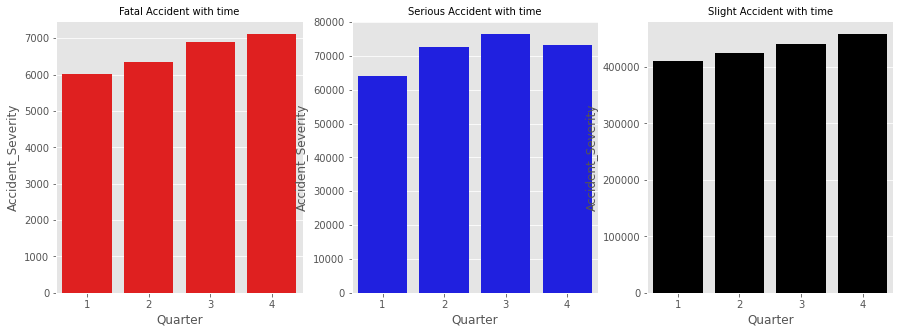

In [ ]:
# analysing the total count of accident in each Quarter
df['Quarter'] = df['Date'].dt.quarter

df_fatal = df[df['Accident_Severity'] == 'Fatal'][['Accident_Severity','Quarter']].groupby(by = 'Quarter').count()
df_serious = df[df['Accident_Severity'] == 'Serious'][['Accident_Severity','Quarter']].groupby(by = 'Quarter').count()
df_slight = df[df['Accident_Severity'] == 'Slight'][['Accident_Severity','Quarter']].groupby(by = 'Quarter').count()

figure, axes = plt.subplots(1,3, figsize=( 15, 5))
plt.grid('both')

sns.barplot(  y="Accident_Severity", x= df_fatal.index, data=df_fatal,  ax=axes[0], color = 'red')

sns.barplot(  y="Accident_Severity", x= df_serious.index, data=df_serious,  ax=axes[1], color = 'blue')

sns.barplot(  y="Accident_Severity", x= df_slight.index, data=df_slight,  ax=axes[2], color = 'black')


axes[0].set_title('Fatal Accident with time',  fontsize= 10)
axes[1].set_title('Serious Accident with time',  fontsize=10)
axes[2].set_title('Slight Accident with time', fontsize= 10)



Obseravtion:

1. It seems 4th Quarter has more accident chance

## 2.2 Analysis for accident severity with time.

In [ ]:
df['Time'] = pd.to_datetime(df['Time'], format = '%H:%M:%S')
df['Time'].dtypes
df['Hour'] = df['Time'].apply(lambda x : x.hour)


Text(0.5, 1.0, 'Slight Accident with time')

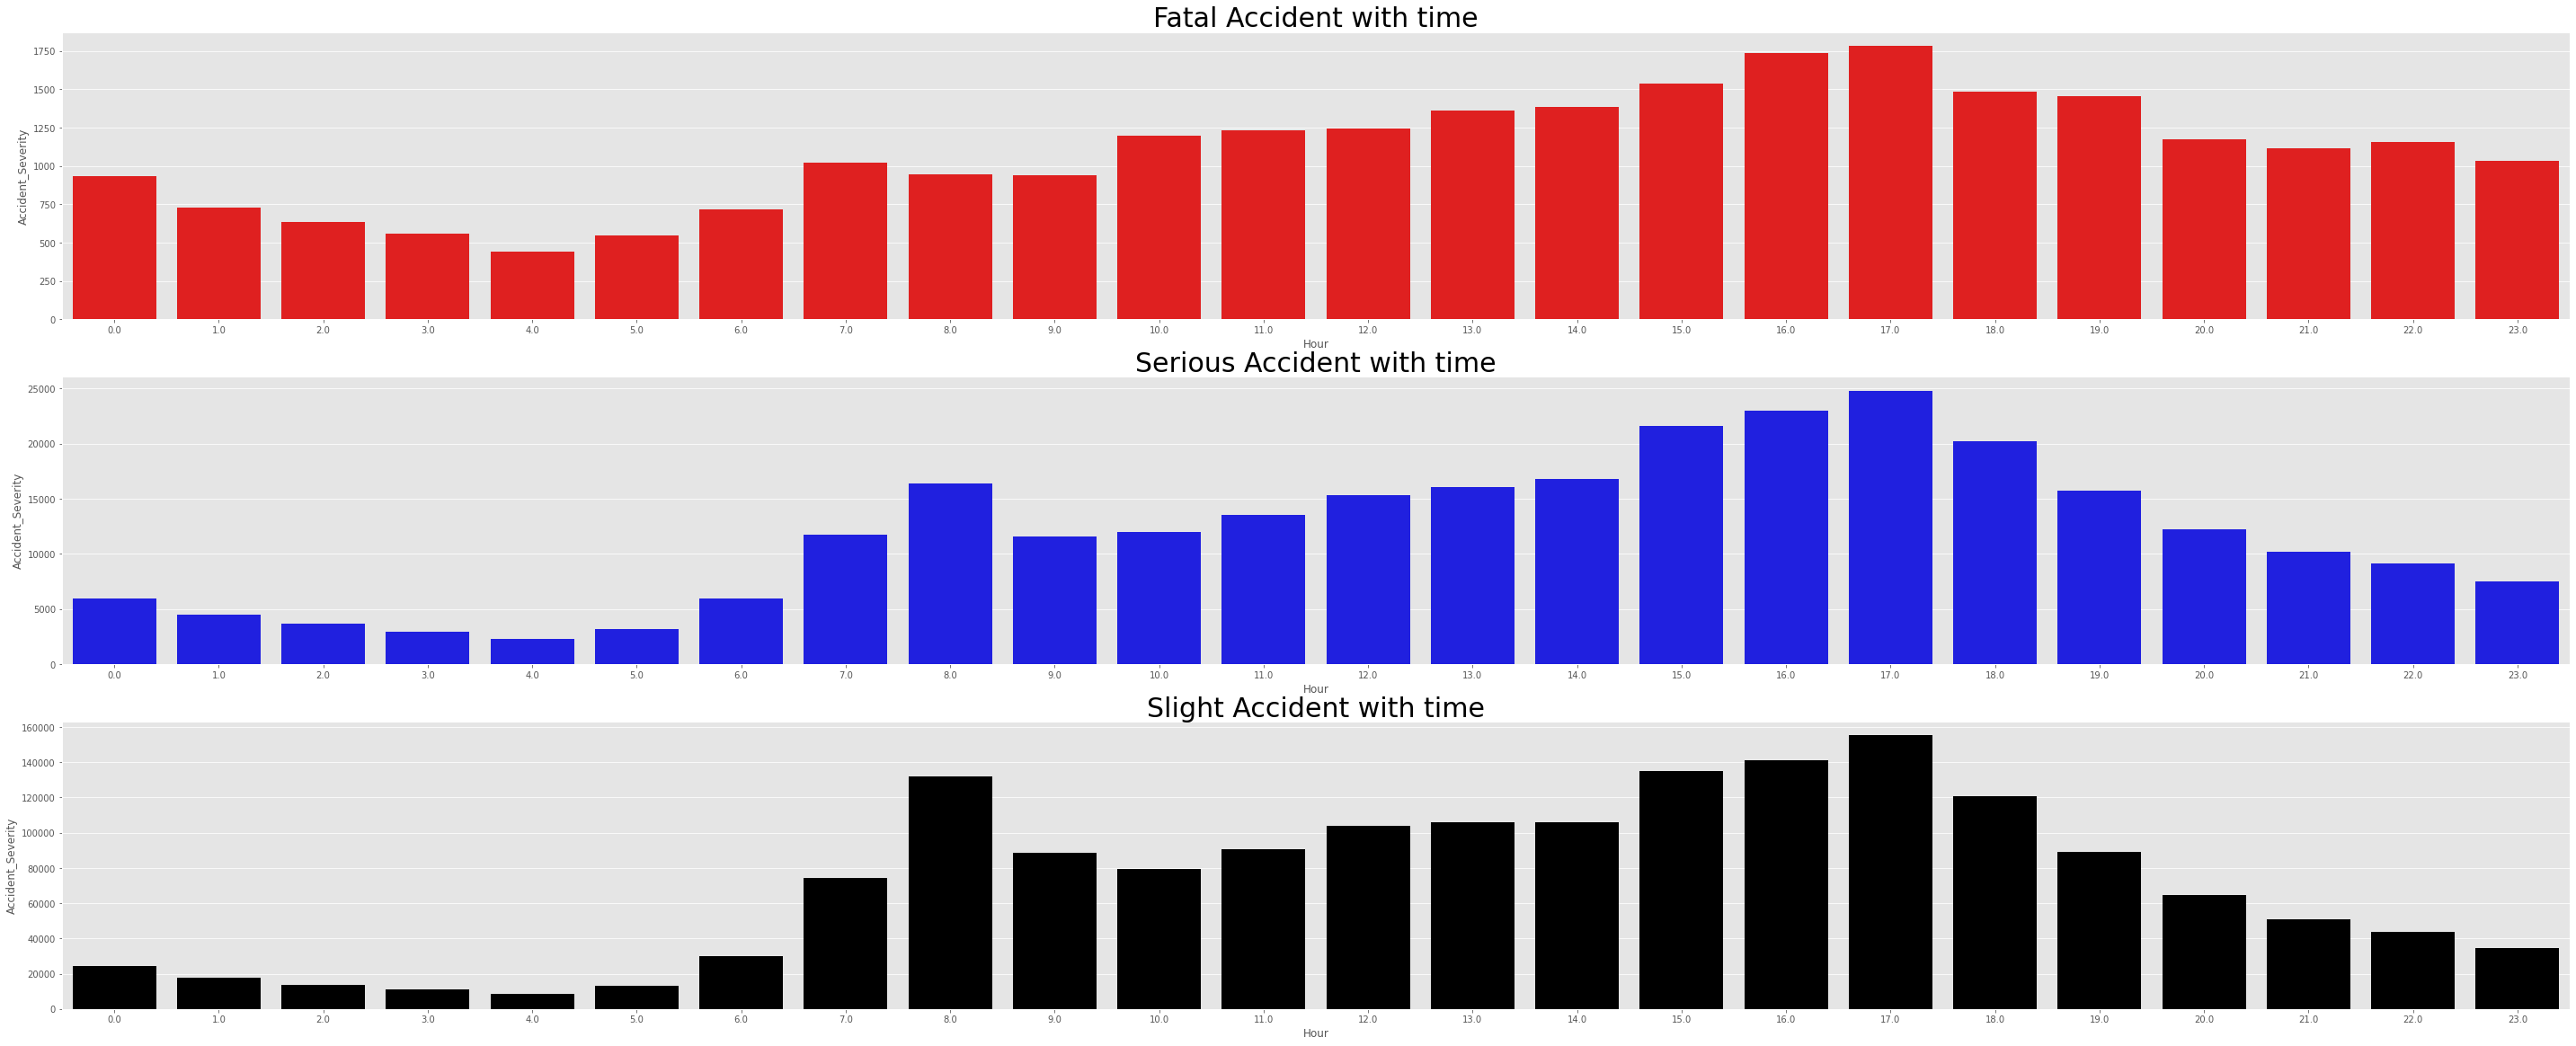

In [ ]:
# analysing the count of accident sevearity quarter wise

df_fatal = df[df['Accident_Severity'] == 'Fatal'][['Accident_Severity','Hour']].groupby(by = 'Hour').count()
df_serious = df[df['Accident_Severity'] == 'Serious'][['Accident_Severity','Hour']].groupby(by = 'Hour').count()
df_slight = df[df['Accident_Severity'] == 'Slight'][['Accident_Severity','Hour']].groupby(by = 'Hour').count()

figure, axes = plt.subplots(3, figsize=(50, 20))
plt.grid('both')

sns.barplot(  y="Accident_Severity", x= df_fatal.index, data=df_fatal,  ax=axes[0], color = 'red')

sns.barplot(  y="Accident_Severity", x= df_serious.index, data=df_serious,  ax=axes[1], color = 'blue')

sns.barplot(  y="Accident_Severity", x= df_slight.index, data=df_slight,  ax=axes[2], color = 'black')

axes[0].set_title('Fatal Accident with time',  fontsize= 30)
axes[1].set_title('Serious Accident with time',  fontsize= 30)
axes[2].set_title('Slight Accident with time', fontsize= 30)


Observation:
1. Probablity of accident in morning 7:00Am to 8:00PM is very high as compared to 
2. Between 01:00 to 05:00 hours there is significant decrease in slight and serious accident, the same is not visible in fatal accidents. 


# 3 Analysing the time series

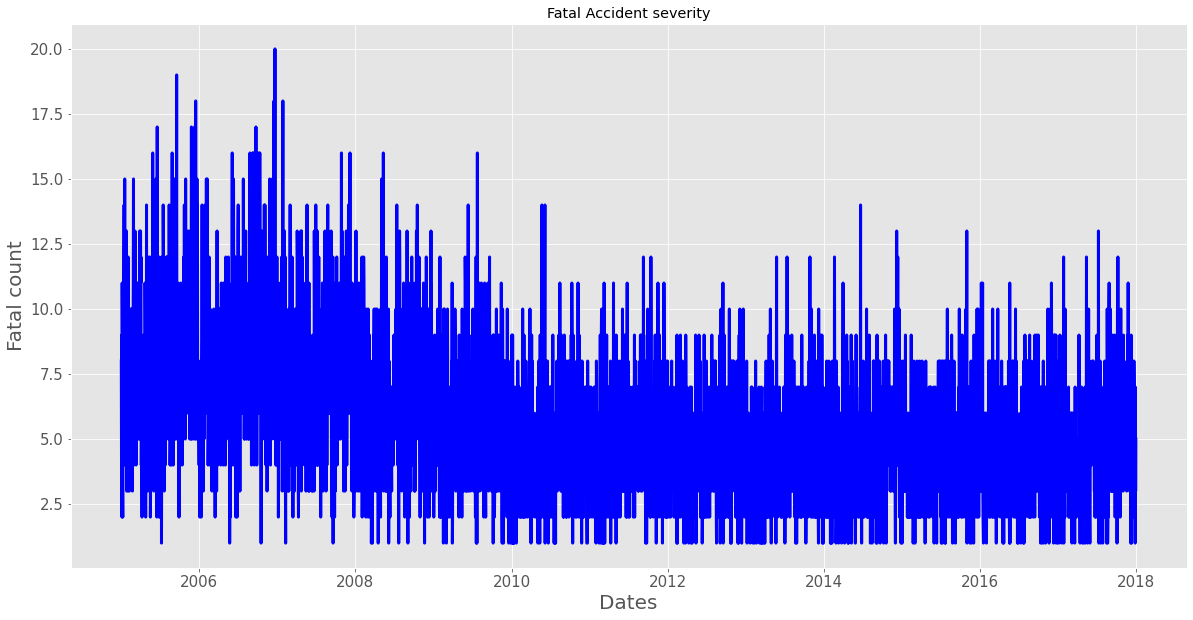

In [ ]:
df_fatal = df[df['Accident_Severity'] == 'Fatal'][['Accident_Severity','Date']].groupby(by = 'Date').count()
df_serious = df[df['Accident_Severity'] == 'Serious'][['Accident_Severity','Date']].groupby(by = 'Date').count()
df_slight = df[df['Accident_Severity'] == 'Slight'][['Accident_Severity','Date']].groupby(by = 'Date').count()


plt.style.use('ggplot')
plt.figure(figsize=(20,10))
plt.grid(True)
plt.xlabel('Dates', fontsize = 20)
plt.xticks(fontsize = 15)
plt.ylabel('Fatal count', fontsize = 20)
plt.yticks(fontsize = 15)
plt.plot(df_fatal['Accident_Severity'], linewidth = 3, color = 'blue')
plt.title('Fatal Accident severity')
plt.show()

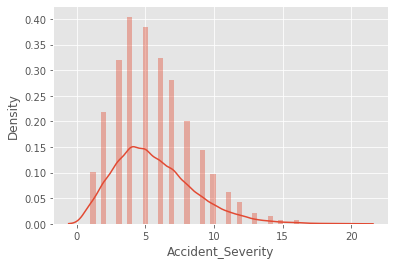

In [ ]:
df_fatal.columns
sns.distplot(df_fatal['Accident_Severity'])

Graph is righ skewed

## 3.1 Checking if graph is stationary?  

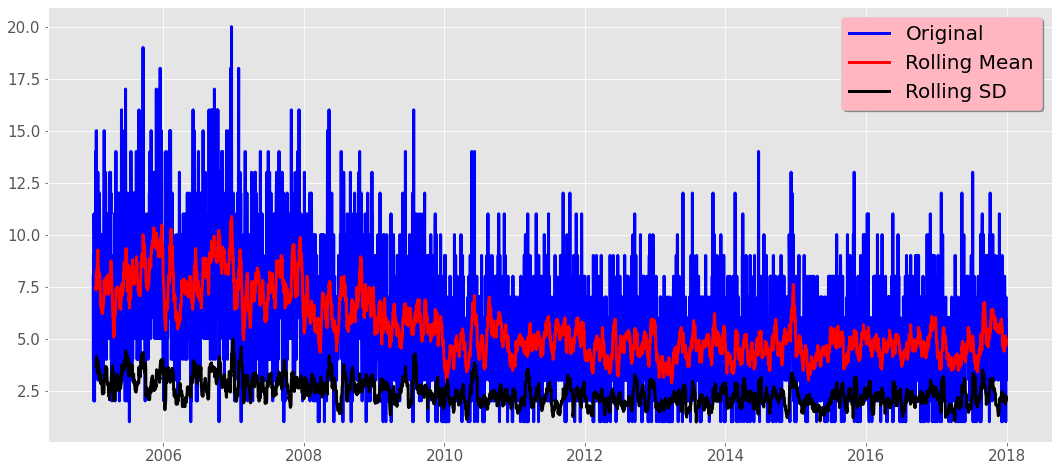

Result of Dickey Fuller test
Test Statistics            -4.776727
p-value                     0.000060
No of lags                 28.000000
No of observations       4663.000000
Critical values (1%)       -3.431753
Critical values (5%)       -2.862160
Critical values (10%)      -2.567100
dtype: float64


In [ ]:
# Checking if the series is stationary?

def stationary_test(timeseries):
    # determine the rolling stats
    rolmean = timeseries.rolling(15).mean()
    rolsd = timeseries.rolling(15).std()
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color = 'blue', label = 'Original', linewidth = 3)
    plt.plot(rolmean, color = 'red', label = 'Rolling Mean' , linewidth = 3)
    plt.plot(rolsd, color = 'black' , label = 'Rolling SD' , linewidth = 3)
    plt.legend(loc = 'best' , fontsize = 20 , shadow = True, facecolor = 'lightpink')
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show()
    print('Result of Dickey Fuller test')
    dicky_test = adfuller(timeseries, autolag = 'AIC') 
    out = pd.Series(dicky_test[0:4], index = ['Test Statistics' , 'p-value' , 'No of lags' , 'No of observations'])
    for key, values in dicky_test[4].items():
        out['Critical values (%s)'%key] = values
    print(out)

stationary_test(df_fatal)

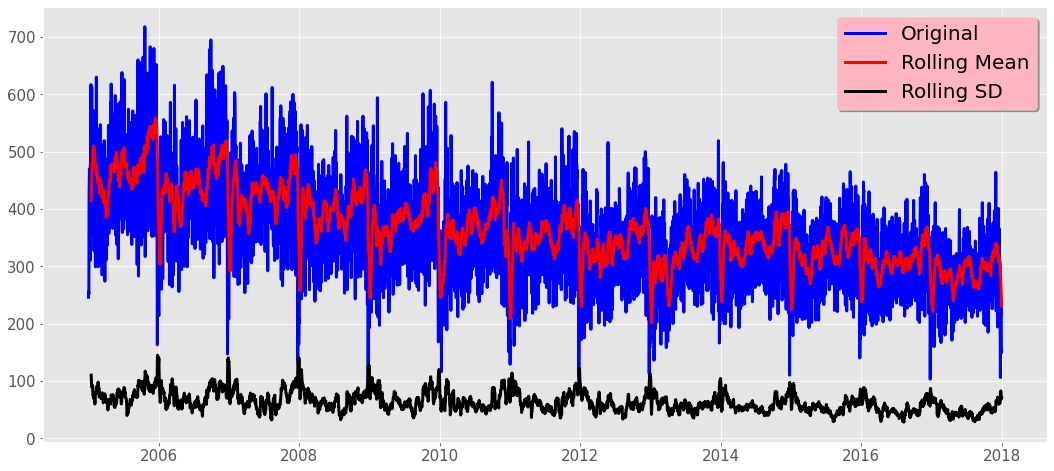

Result of Dickey Fuller test
Test Statistics            -4.848245
p-value                     0.000044
No of lags                 29.000000
No of observations       4718.000000
Critical values (1%)       -3.431737
Critical values (5%)       -2.862153
Critical values (10%)      -2.567096
dtype: float64


In [ ]:
stationary_test(df_slight)

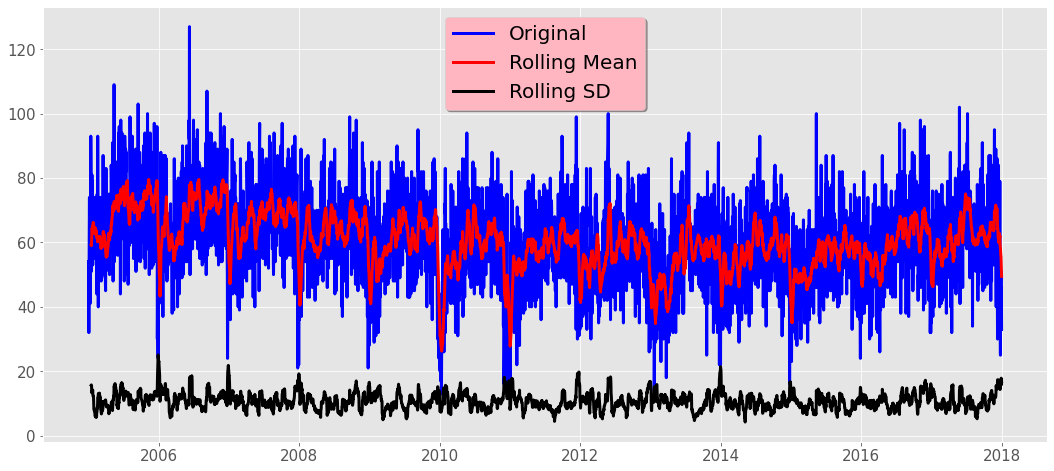

Result of Dickey Fuller test
Test Statistics         -6.408943e+00
p-value                  1.912066e-08
No of lags               2.900000e+01
No of observations       4.718000e+03
Critical values (1%)    -3.431737e+00
Critical values (5%)    -2.862153e+00
Critical values (10%)   -2.567096e+00
dtype: float64


In [ ]:
stationary_test(df_serious)

Observations:
1. For fatal accidents, p-value is less than .05, so it can concluded that graph is stationary.

2. For serious accidents, p-value is less than .05, so it can concluded that graph is stationary.

3. For slight accidents, p-value is less than .05, so it can concluded that graph is stationary.



## 3.2 Decomposing the time series

<Figure size 1440x720 with 0 Axes>

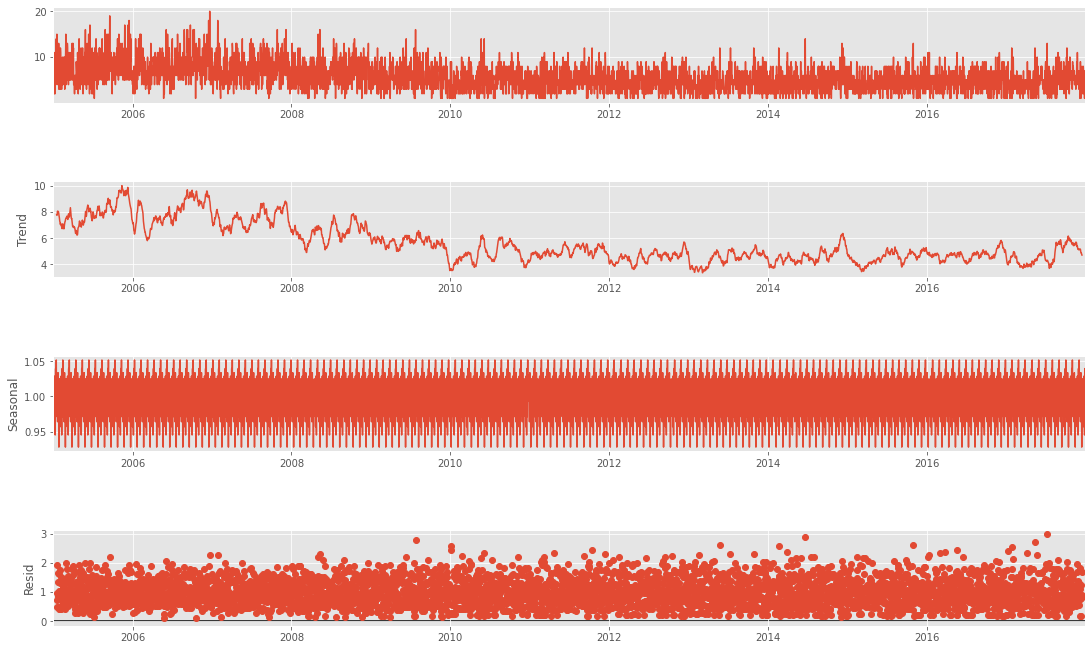

In [ ]:
# Fatal accident

decompose_fatal = seasonal_decompose(df_fatal[['Accident_Severity']] , model = 'multplicative', period = 30)
figure = plt.figure(figsize = (20,10))
fig = decompose_fatal.plot()
fig.set_size_inches(17, 10)

<Figure size 1440x720 with 0 Axes>

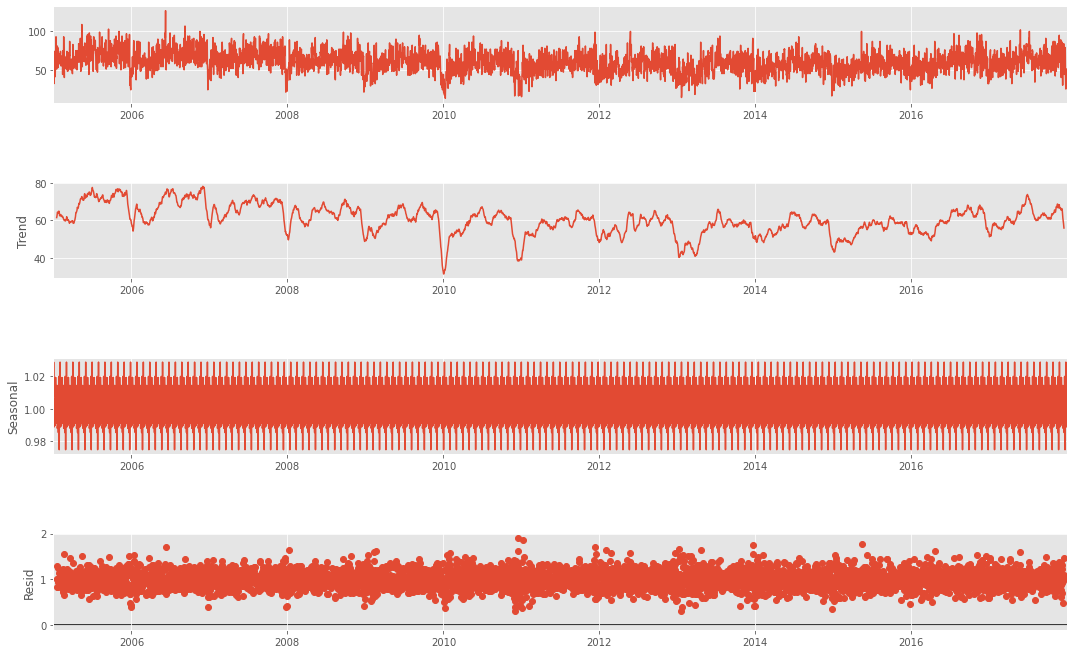

In [ ]:
# serious accidents
decompose_serious = seasonal_decompose(df_serious[['Accident_Severity']], model = 'multiplicative' , period = 30)
fig = plt.figure(figsize = (20,10))
fig = decompose_serious.plot()
fig.set_size_inches(17,10)

<Figure size 1440x720 with 0 Axes>

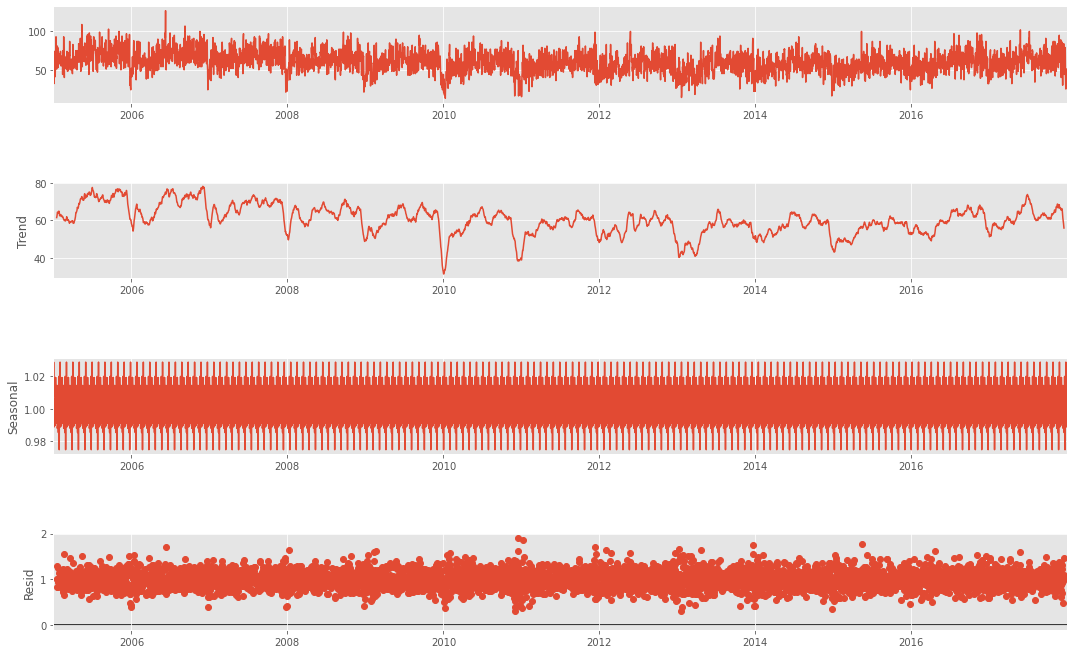

In [ ]:
# slight accidents
decompose_slight = seasonal_decompose(df_slight[['Accident_Severity']], model = 'multiplicative' , period = 30)
fig = plt.figure(figsize = (20,10))
fig = decompose_serious.plot()
fig.set_size_inches(17,10)

# 4 Model building



## 4.1 Spliting the data into train and test set

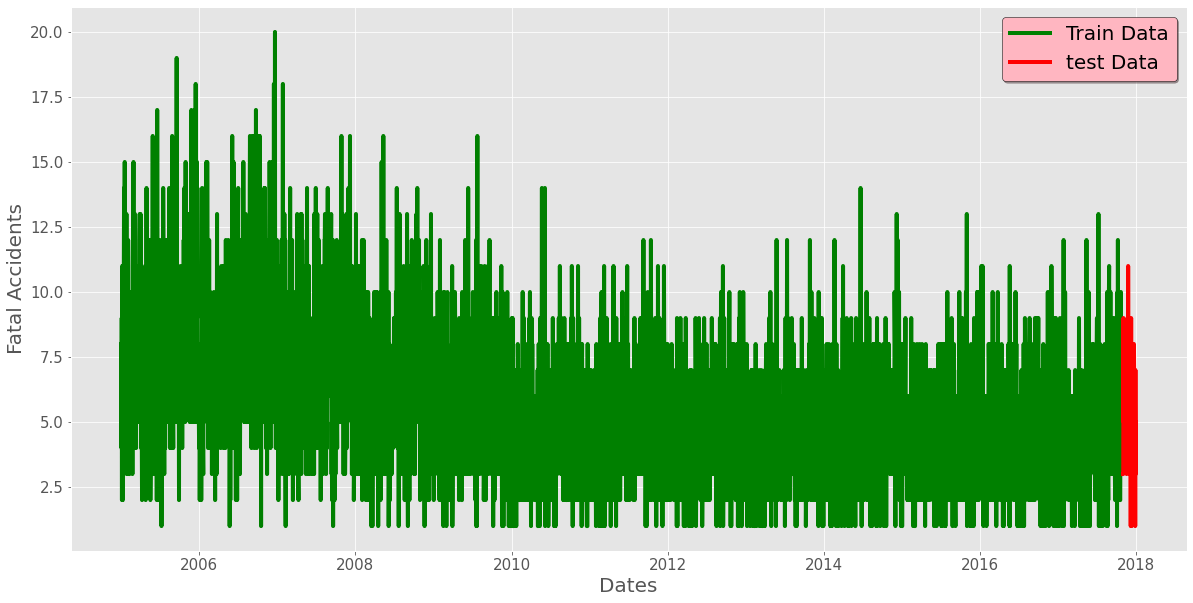

In [ ]:
# split the df_fatal data into train and test set 
train_data_fatal = df_fatal[0:-60] 
test_data_fatal = df_fatal[-60:]
plt.figure(figsize = (20,10))
plt.grid(True)
plt.xlabel('Dates' , fontsize = 20 )
plt.ylabel('Fatal Accidents' , fontsize = 20 )
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.plot(train_data_fatal, 'green', label = 'Train Data', linewidth = 4)
plt.plot(test_data_fatal, 'red', label = 'test Data', linewidth = 4)
plt.legend(fontsize = 20, shadow = True, facecolor = 'lightpink', edgecolor = 'k')



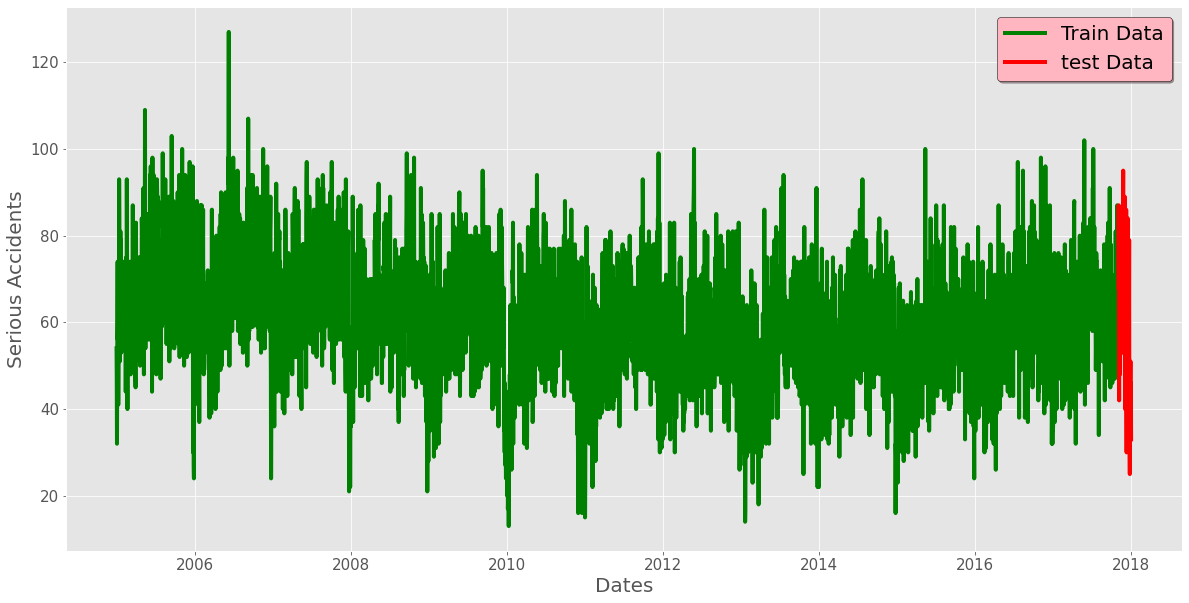

In [ ]:
# split the df_serious data into train and test set 
train_data_serious = df_serious[0:-60] 
test_data_serious = df_serious[-60:]
plt.figure(figsize = (20,10))
plt.grid(True)
plt.xlabel('Dates' , fontsize = 20 )
plt.ylabel('Serious Accidents' , fontsize = 20 )
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.plot(train_data_serious, 'green', label = 'Train Data', linewidth = 4)
plt.plot(test_data_serious, 'red', label = 'test Data', linewidth = 4)
plt.legend(fontsize = 20, shadow = True, facecolor = 'lightpink', edgecolor = 'k')


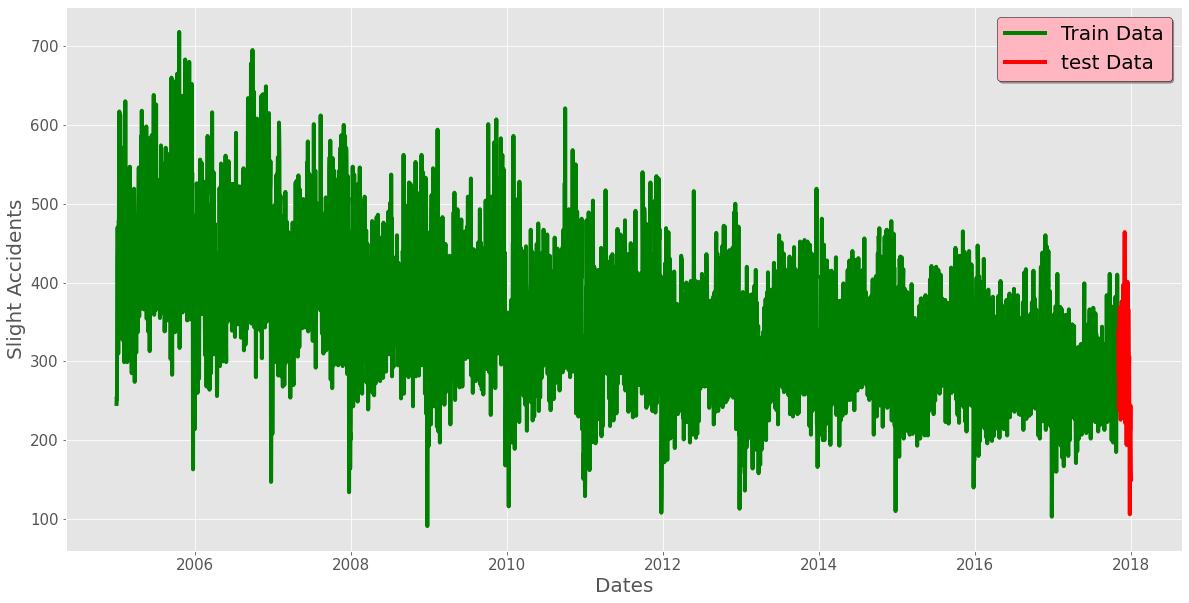

In [ ]:
# split the df_serious data into train and test set 
train_data_slight = df_slight[0:-60] 
test_data_slight = df_slight[-60:]
plt.figure(figsize = (20,10))
plt.grid(True)
plt.xlabel('Dates' , fontsize = 20 )
plt.ylabel('Slight Accidents' , fontsize = 20 )
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.plot(train_data_slight, 'green', label = 'Train Data', linewidth = 4)
plt.plot(test_data_slight, 'red', label = 'test Data', linewidth = 4)
plt.legend(fontsize = 20, shadow = True, facecolor = 'lightpink', edgecolor = 'k')


## 4.2 Creating the ARIMA Model

**Finding Autocorrelation and partial correlation**

In [ ]:
from  statsmodels.graphics.tsaplots import plot_acf 
from  statsmodels.graphics.tsaplots import plot_pacf 


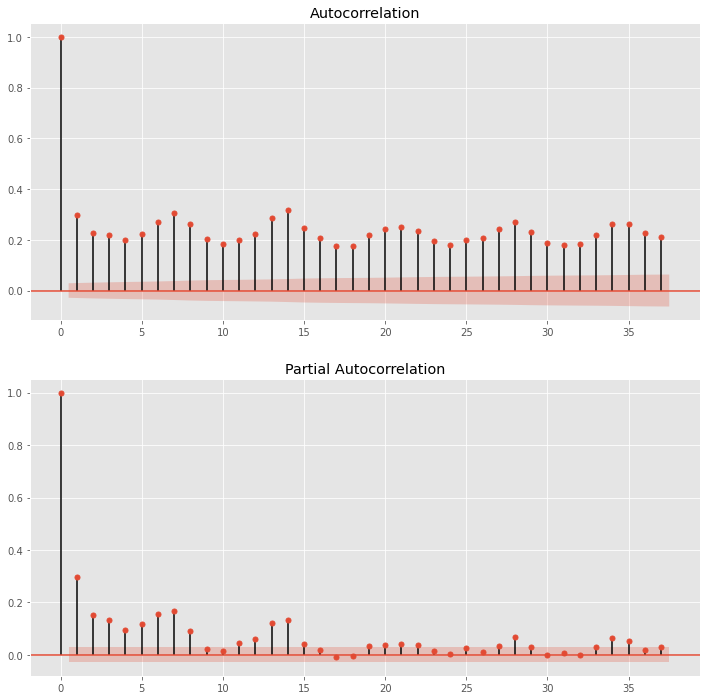

In [ ]:
fig = plt.figure(figsize = (12,12))
ax1 = fig.add_subplot(211)
fig = plot_acf(df_fatal, ax = ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df_fatal, ax = ax2)

Choosing p: The lag value where the PACF chart is maximum p=1.

Choosing q: The lag value where the ACF chart is maximum q=1.


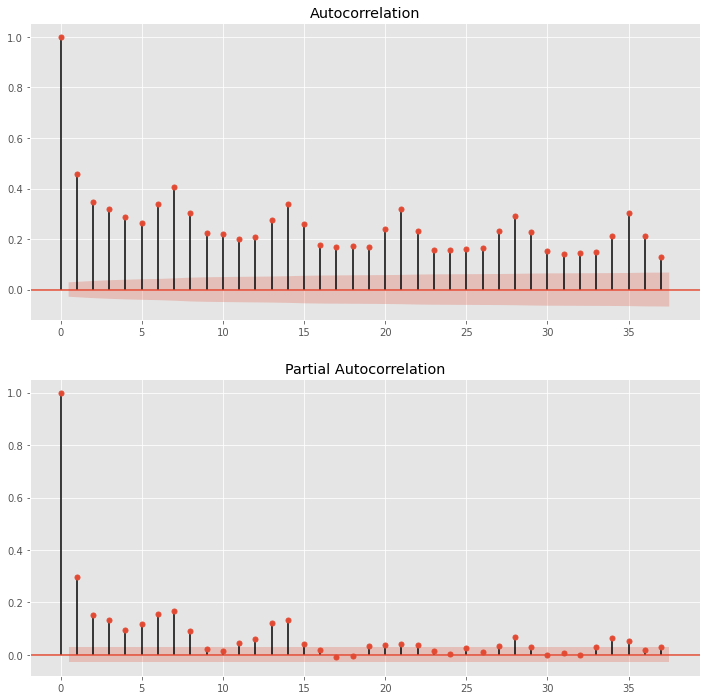

In [ ]:
fig = plt.figure(figsize = (12,12))
ax1 = fig.add_subplot(211)
fig = plot_acf(df_serious, ax = ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df_fatal, ax = ax2)

Choosing p: The lag value where the PACF chart is maximum p=1.

Choosing q: The lag value where the ACF chart is maximum q=1.


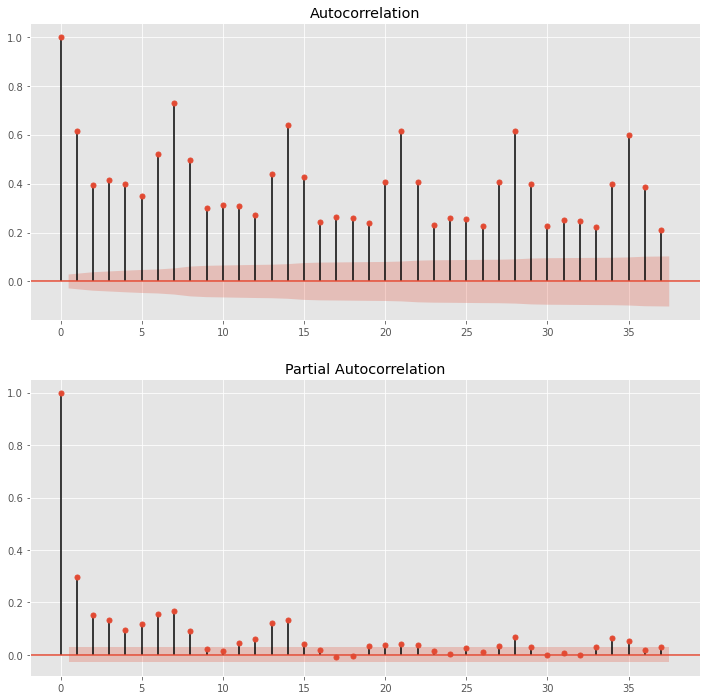

In [ ]:
fig = plt.figure(figsize = (12,12))
ax1 = fig.add_subplot(211)
fig = plot_acf(df_slight, ax = ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df_fatal, ax = ax2)

Choosing p: The lag value where the PACF chart is maximum p=1.

Choosing q: The lag value where the ACF chart is maximum q=7.


**Finding best parameter for the ARIMA model** 

In [ ]:
from sklearn.metrics import mean_squared_error
def evaluate_arima_model(x, y , arima_order):
    # prepare training dataset 
    # Make prediction dataset 
    history = [i for i in x]
    predictions = list()
    for t in range(len(y)):
        model = ARIMA(history, order = arima_order)
        model_fit = model.fit()
        y_hat = model_fit.forecast()[0]
        predictions.append(y_hat)
        history.append(y[t])
    # cacluate out of sample error 
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return rmse


In [54]:
# evaluate different combination of p, d and q
def evaluate_model(dataset, test, p_values, d_values ,q_values):
    dataset = dataset.astype('float')
    score_list = []
    cfg_list = []
    best_score, best_cgf = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, test, order)
                    score_list.append(rmse)
                    cfg_list.append(str(order))                    
                    # print('ARIMA %s RMSE= %.3f'%(order, rmse))
                except:
                    continue
    a = score_list.index(min(score_list))        
    # print('Best ARIMA%s RMSE = %.3f' % (cfg_list[a], score_list[a]))
    return pd.DataFrame( score_list, cfg_list, columns = ['RMSE'])

p_value = range(0,3)
q_value = range(0,3)
d_value = range(0,3)

warnings.filterwarnings('ignore')

result_fatal = evaluate_model(train_data_fatal['Accident_Severity'], test_data_fatal['Accident_Severity'], p_value, d_value, q_value)
result_serious = evaluate_model(train_data_serious['Accident_Severity'], test_data_serious['Accident_Severity'], p_value, d_value, q_value)
result_slight = evaluate_model(train_data_slight['Accident_Severity'], test_data_slight['Accident_Severity'], p_value, d_value, q_value)


In [ ]:
# selecting best configuration 
cfg_fatal = result_fatal[result_fatal['RMSE'] == min(result_fatal['RMSE'])].index[0]
cfg_serious = result_serious[result_serious['RMSE'] == min(result_serious['RMSE'])].index[0]
cfg_slight = result_slight[result_slight['RMSE'] == min(result_slight['RMSE'])].index[0]

cfg_fatal = tuple(map(int, cfg_fatal.strip('(').strip(')').split(', ')))
cfg_serious = tuple(map(int, cfg_serious.strip('(').strip(')').split(', ')))
cfg_slight = tuple(map(int, cfg_slight.strip('(').strip(')').split(', ')))



In [ ]:
model_fatal = ARIMA(df_fatal['Accident_Severity'], order = cfg_fatal)
model_serious = ARIMA(df_serious['Accident_Severity'], order = cfg_serious)
model_slight = ARIMA(df_slight['Accident_Severity'], order = cfg_slight)



In [ ]:

model_fit_fatal = model_fatal.fit()
model_fit_serious = model_serious.fit()
model_fit_slight = model_slight.fit()


In [ ]:
print('Fatal model summary')
print(model_fit_fatal.summary())

Fatal model summary
                              ARMA Model Results                              
Dep. Variable:      Accident_Severity   No. Observations:                 4692
Model:                     ARMA(0, 0)   Log Likelihood              -11586.478
Method:                           css   S.D. of innovations              2.859
Date:                Sun, 30 Oct 2022   AIC                          23176.957
Time:                        13:54:46   BIC                          23189.864
Sample:                             0   HQIC                         23181.495
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6196      0.042    134.638      0.000       5.538       5.701


In [ ]:
print('Serious model summary')
print(model_fit_serious.summary())

Serious model summary
                              ARMA Model Results                              
Dep. Variable:      Accident_Severity   No. Observations:                 4748
Model:                     ARMA(1, 0)   Log Likelihood              -18531.641
Method:                       css-mle   S.D. of innovations             11.990
Date:                Sun, 30 Oct 2022   AIC                          37069.282
Time:                        13:54:46   BIC                          37088.678
Sample:                    01-01-2005   HQIC                         37076.098
                         - 12-31-2017                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      60.2981      0.321    187.685      0.000      59.668      60.928
ar.L1.Accident_Severity     0.4585      0.013     35.535      0.000   

In [ ]:
print('Slight model summary')
print(model_fit_slight.summary())

Slight model summary
                              ARIMA Model Results                              
Dep. Variable:     D.Accident_Severity   No. Observations:                 4747
Model:                  ARIMA(2, 1, 0)   Log Likelihood              -26949.714
Method:                        css-mle   S.D. of innovations             70.685
Date:                 Sun, 30 Oct 2022   AIC                          53907.429
Time:                         13:54:46   BIC                          53933.290
Sample:                     01-02-2005   HQIC                         53916.517
                          - 12-31-2017                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.0183      0.616     -0.030      0.976      -1.225       1.189
ar.L1.D.Accident_Severity    -0.2925      0.013    -21.73

In [ ]:
# predict
from datetime import datetime
test_data_fatal
start_index_fatal = datetime(2017, 11, 1)
end_index_fatal = datetime(2017 , 12, 31)
forecast = model_fit_fatal.predict(start=start_index_fatal, end = end_index_fatal)

# visualization
plt.figure(figsize=(22,10))
plt.plot(weather_bin.Date,weather_bin.MeanTemp,label = "original")
plt.plot(forecast,label = "predicted")
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.legend()
plt.show()

UFuncTypeError: ignored